In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.io import imread

In [2]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [3]:
img1 = gaussian(imread('imgs/bw11.jpg'), 1.5)
img2 = gaussian(imread('imgs/bw12.jpg'), 1.5)

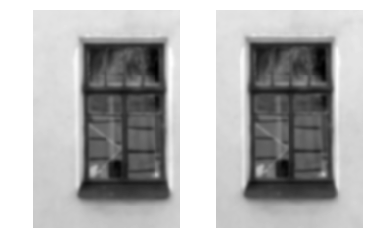

In [4]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
plt.show()

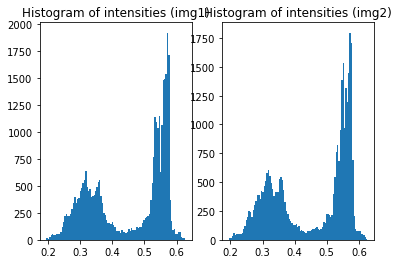

In [5]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(img1.ravel(), bins=100)
axs[0].set_title('Histogram of intensities (img1)')
axs[1].hist(img2.ravel(), bins=100)
axs[1].set_title('Histogram of intensities (img2)')
plt.show()

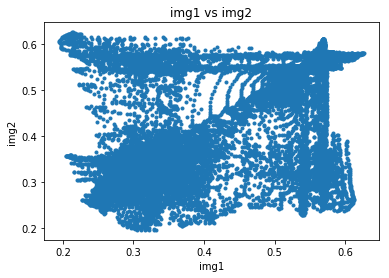

In [6]:
plt.plot(img1.ravel(), img2.ravel(), '.')
plt.xlabel('img1')
plt.ylabel('img2')
plt.title('img1 vs img2')
plt.show()

In [7]:
np.corrcoef(img1.ravel(), img2.ravel())[0, 1]

0.6080306270074414

In [8]:
tr_img1 = (img1 >= 0.25) & (img1 <= 0.35)

Text(0.5,1,'share')

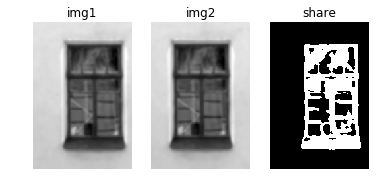

In [9]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('img1')
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('img2')
axs[2].imshow(tr_img1)
axs[2].axis('off')
axs[2].set_title('share')

In [10]:
# 2d histogram shows the same relationship between img1 and img2
h_v, x, y = np.histogram2d(img1.ravel(), img2.ravel(), bins=20)

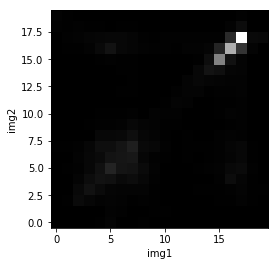

In [11]:
plt.imshow(h_v.T, origin='lower')
plt.xlabel('img1')
plt.ylabel('img2')
plt.show()

In [12]:
def mutual_information(hg):
    pxy = hg / np.sum(hg)
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = px[:, None]*py[None, :]
    #plt.imshow(px_py.T, origin='lower')
    nzs = pxy > 0
    return np.sum(pxy[nzs]*np.log(pxy[nzs] / px_py[nzs]))

mutual_information(h_v)

0.5971189435108994

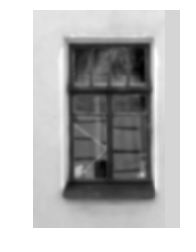

In [13]:
h_shift = 15
mvd_img1 = np.full(img1.shape, np.mean(img1[:, 0:35]))
mvd_img1[:, :img1.shape[1]-h_shift] = img1[:, h_shift:]

plt.imshow(mvd_img1)
plt.axis('off')
plt.show()

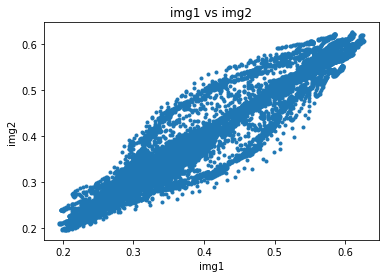

In [14]:
plt.plot(mvd_img1.ravel(), img2.ravel(), '.')
plt.xlabel('img1')
plt.ylabel('img2')
plt.title('img1 vs img2')
plt.show()

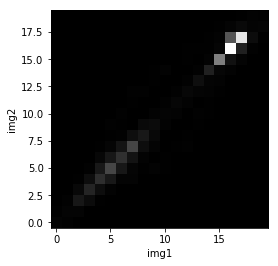

In [15]:
h_v, x, y = np.histogram2d(mvd_img1.ravel(), img2.ravel(), bins=20)

#plt.imshow(np.log(h_v.T+1e-5), origin='lower')
plt.imshow(h_v.T, origin='lower')
plt.xlabel('img1')
plt.ylabel('img2')
plt.show()

In [16]:
mutual_information(h_v)

1.4124255141466837

In [36]:
# to maximize mutual information w-parameters must be tuned
N = 25
HALF_N = N // 2
wf = np.zeros([N, N])
progress = 0
FILL_MEAN = np.mean(img1[:, 0:35])
for i in range(0, N):
    for j in range(0, N):
        mvd_img1 = np.full(img1.shape, FILL_MEAN)
        mvd_img1[:i, :j] =\
            img1[:i, :j]
        
        h_v, _, _ = np.histogram2d(mvd_img1.ravel(), img2.ravel(), bins=20)
        v = mutual_information(h_v)
        wf[i, j] = v
        progress += 1
        print('\r{0:3.0f} %'.format(100*(progress/N**2)), end='', flush=True)

100 %

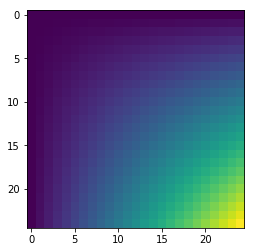

In [38]:
plt.imshow(wf, cmap='viridis')
#plt.axis('off')
plt.show()

In [49]:
wf = np.zeros_like(img1)
progress = 0
FILL_MEAN = np.mean(img1[:, 0:35])
for i in range(0, wf.shape[0]):
    for j in range(0, wf.shape[1]):
        mvd_img1 = np.full(img1.shape, FILL_MEAN)
        mvd_img1[:i, :j] =\
            img1[img1.shape[0]-i:, img1.shape[1]-j:]
        
        h_v, _, _ = np.histogram2d(mvd_img1.ravel(), img2.ravel(), bins=20)
        v = mutual_information(h_v)
        wf[i, j] = v
        progress += 1
        print('\r{0:3.0f} %'.format(100*(progress/img1.size)), end='', flush=True)

100 %

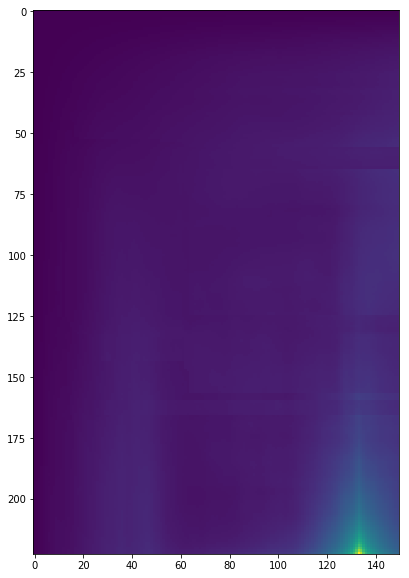

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(wf, cmap='viridis')
#plt.axis('off')
plt.show()

In [51]:
wf = np.zeros_like(img1)
progress = 0
FILL_MEAN = np.mean(img1[:, 0:35])
for i in range(0, wf.shape[0]):
    for j in range(0, wf.shape[1]):
        mvd_img1 = np.full(img1.shape, FILL_MEAN)
        mvd_img1[i:, j:] =\
            img1[i:, j:]
        
        h_v, _, _ = np.histogram2d(mvd_img1.ravel(), img2.ravel(), bins=20)
        v = mutual_information(h_v)
        wf[i, j] = v
        progress += 1
        print('\r{0:3.0f} %'.format(100*(progress/img1.size)), end='', flush=True)

100 %

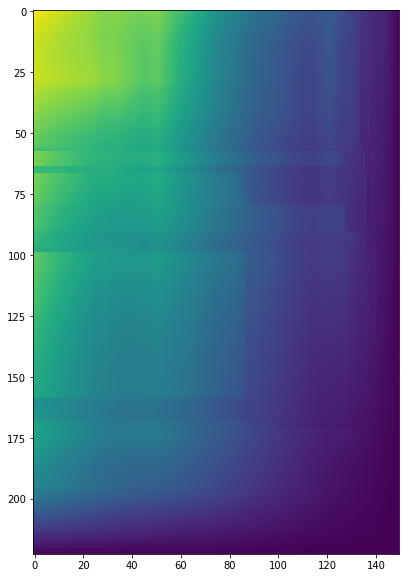

In [52]:
plt.figure(figsize=(10, 10))
plt.imshow(wf, cmap='viridis')
#plt.axis('off')
plt.show()

In [55]:
np.argwhere(wf == wf.max())

array([[0, 0]])

In [1]:
# to do: treat i, j as ceneter point